In [1054]:
class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
        
    def get_avg_grade(self):
        total_grades = 0
        gra = self.data_sheet.get_grades_as_list()
        for grade in gra:
            total_grades += grade
        return total_grades/len(gra)
    
    def progress(self):
        total_etcs = 0
        for c in self.data_sheet.courses:
            total_etcs += c.ETCS
        return total_etcs/150

In [1055]:
class Course():
    
    def __init__(self,name, classroom, teacher, ETCS, grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ETCS = ETCS
        self.grade = grade

In [1056]:
class DataSheet():
    def __init__(self, courses):
        self.courses = courses
    
    def add(self, course):
        self.courses.append(course)
        
    def get_grades_as_list(self):
        g = []
        for course in self.courses:
            g.append(course.grade)
        return g

In [1057]:
data_sheet = DataSheet([random.choice(courses),random.choice(courses)])
new_student = Student("John", "male", data_sheet, "www.idiot.dk")

In [1058]:
new_student.get_avg_grade()

12.0

In [1059]:
names = ["John", "Svend", "Birgit", "Jonna"]
grades = [0,2,4,7,10,12]
gender = ["male", "female"]
img_urls = ["www.hej.dk", "www.elefant.com", "www.trist.dumt"]
dansk = Course("dansk","B102", "Svenning", 20, random.choice(grades))
tysk = Course("tysk","C202", "Kim", 10, random.choice(grades))
engelsk = Course("engelsk","Q902", "Johanne", 40, random.choice(grades))
fransk = Course("fransk","R122", "Maria", 5, random.choice(grades))
courses = [dansk, tysk, engelsk,fransk]

In [1060]:
import random
import csv

def random_student(amount):
    headers = ["stud_name", "stud_gender","course_name","teacher","etcs","classroom","grade","img_url"]
    students = []
    filename = './students.csv'
    for number in range(amount):
        student = Student(random.choice(names),random.choice(gender), DataSheet([random.choice(courses),random.choice(courses)]),random.choice(img_urls))
        students.append(student)
        
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        for student in students:
            for data in student.data_sheet.courses:
                    writer.writerow([student.name,student.gender, data.name,data.teacher,data.ETCS,data.classroom,data.grade, student.image_url])

In [1061]:
random_student(3)

In [1062]:
filename = './students.csv'
csv_students = []
with open(filename) as f_obj:
    csvreader = csv.reader(f_obj)
    next(csvreader)

    for line in csvreader:
        if any(student.name == line[0] for student in csv_students):
            course = Course(line[2],line[5],line[3],int(line[4]),int(line[6]))
            course2 = next((student for csv_students in csv_students if student.name == line[0]), None).data_sheet.courses
            next((student for csv_students in csv_students if student.name == line[0]), None).data_sheet.courses = [course, course2]
            print("hej")
        else:
            course = Course(line[2],line[5],line[3],int(line[4]),int(line[6]))
            data_sheet = DataSheet(course)
            student = Student(line[0], line[1],data_sheet,line[7])
            csv_students.append(student)


for student in csv_students:
            for data in student.data_sheet.courses:
                    print(student.name,student.gender, data.name,data.teacher,data.ETCS,data.classroom,data.grade, student.image_url)

hej
hej
hej
Jonna female tysk Kim 10 C202 4 www.elefant.com
Jonna female tysk Kim 10 C202 4 www.elefant.com
John female fransk Maria 5 R122 0 www.elefant.com
John female engelsk Johanne 40 Q902 0 www.elefant.com
Birgit male engelsk Johanne 40 Q902 0 www.hej.dk
Birgit male dansk Svenning 20 B102 12 www.hej.dk


In [1063]:
sorted_student = sorted(csv_students, key=lambda student: student.get_avg_grade())
for student in csv_students:
     print(student.name, student.get_avg_grade())

Jonna 4.0
John 0.0
Birgit 6.0


In [1064]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


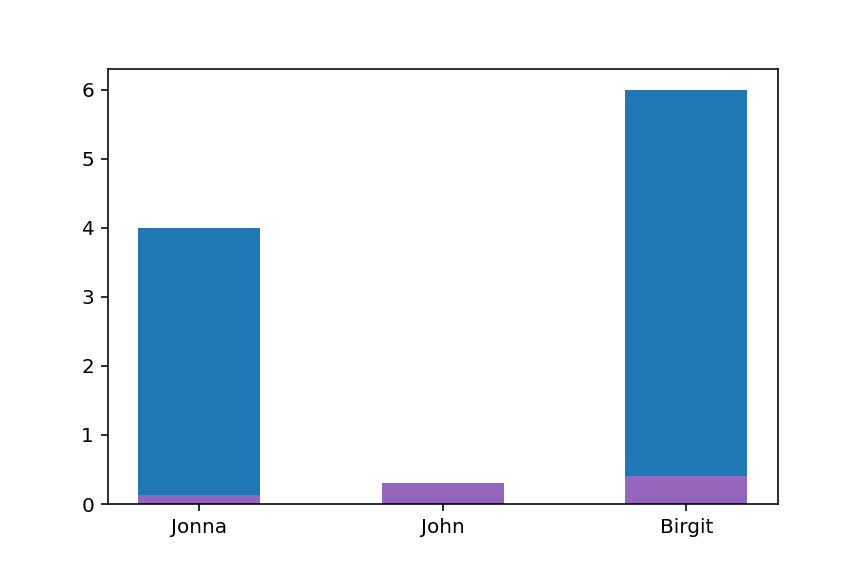

<BarContainer object of 3 artists>

In [1065]:
names = []
grades = []
for student in csv_students:
    names.append(student.name)
    grades.append(student.get_avg_grade())

plt.bar(names,grades,width=0.5, align='center')

In [1066]:
for student in csv_students:
    for c in student.data_sheet.courses:
        print(c.ETCS)

10
10
5
40
40
20


In [1073]:
studentETCSnames = []
studentETCSp = []
for student in csv_students:
    studentETCSnames.append(student.name)
    studentETCSp.append(student.progress())
print(studentETCSnames)
print(studentETCSp)

['Jonna', 'John', 'Birgit']
[0.13333333333333333, 0.3, 0.4]


In [1076]:
plt.bar(studentETCSnames,studentETCSp,width=0.5, align='center')

<BarContainer object of 3 artists>